<a href="https://colab.research.google.com/github/Shashwat-spyder/NYC-Taxi-Trip-Time/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [53]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [55]:
nyc_df=pd.read_csv('/content/Drive/My Drive/NYC Taxi Data (1).csv')

In [56]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [57]:
nyc_df.shape

(1458644, 11)

In [58]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [59]:
len(nyc_df[nyc_df.duplicated()])

0

In [60]:
data_dict={'id':'a unique identifier for each trip', 'vendor_id':'code indicating the provider associated with the trip record','pickup_datetime':'date and time when the meter was engaged', \
   'dropoff_datetime':'date and time when the meter was disengaged', 'passenger_count':'the number of passengers in the vehicle (driver entered value)', \
   'pickup_longitude':'the longitude where the meter was engaged', 'pickup_latitude':'the latitude where the meter was engaged', 'dropoff_longitude':' the longitude where the meter was disengaged', \
   'dropoff_latitude':'the latitude where the meter was disengaged', \
   'store_and_fwd_flag':' This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip'}

In [61]:
data_dict

{'dropoff_datetime': 'date and time when the meter was disengaged',
 'dropoff_latitude': 'the latitude where the meter was disengaged',
 'dropoff_longitude': '\u200athe longitude where the meter was disengaged',
 'id': 'a unique identifier for each trip',
 'passenger_count': 'the number of passengers in the vehicle (driver entered value)',
 'pickup_datetime': 'date and time when the meter was engaged',
 'pickup_latitude': 'the latitude where the meter was engaged',
 'pickup_longitude': 'the longitude where the meter was engaged',
 'store_and_fwd_flag': '\u200aThis flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server\u200a—\u200aY=store and forward; N=not a store and forward trip',
 'vendor_id': 'code indicating the provider associated with the trip record'}

In [62]:
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


# **Exploratory Data Analysis**

In [63]:
list(nyc_df.columns)

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


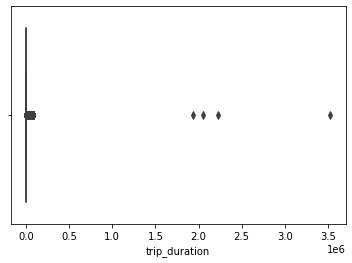

In [64]:
sns.boxplot(nyc_df['trip_duration'])

In [65]:
nyc_df['trip_duration'].sort_values(ascending=False).head(15)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
1221666      86378
91717        86378
1138915      86377
66346        86377
1284067      86369
Name: trip_duration, dtype: int64

In [66]:
nyc_df.drop(nyc_df[nyc_df['trip_duration'] >=1000000].index, inplace = True)

In [67]:
nyc_df[nyc_df['trip_duration']>=1000000]['trip_duration'].count()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


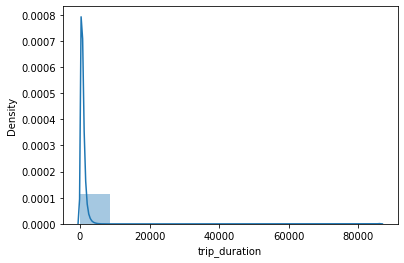

In [68]:
sns.distplot(nyc_df['trip_duration'],bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


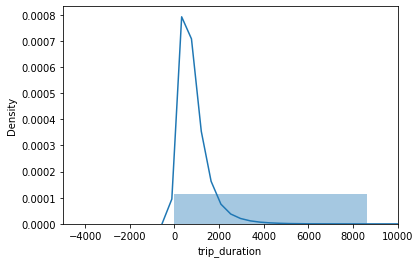

In [69]:
plt.xlim(-5000,10000)
sns.distplot(nyc_df['trip_duration'],bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


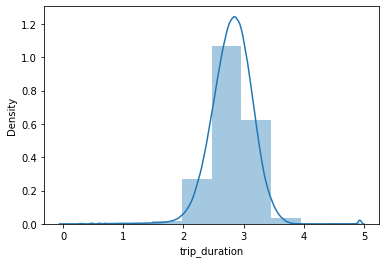

In [70]:
sns.distplot(np.log10(nyc_df['trip_duration']),bins=10)

In [71]:
log=np.log10(nyc_df['trip_duration'].skew())
print(log)
non_log=nyc_df['trip_duration'].skew()
print(non_log)

1.4025822695403904
25.268663357003835


We have dealt with target variable

In [72]:
nyc_df['vendor_id'].unique()

array([2, 1])

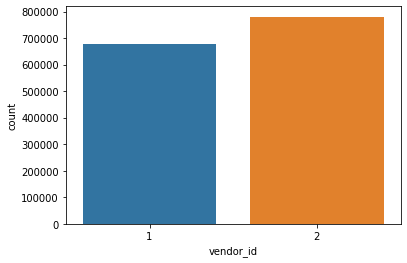

In [73]:
sns.countplot(x='vendor_id', data=nyc_df)

In [74]:
nyc_df[nyc_df['id'].duplicated()]['id'].count()

0

In [75]:
nyc_df['passenger_count'].sort_values(ascending=True)

217765     0
337809     0
1211269    0
278290     0
1092678    0
          ..
433304     7
824904     7
489613     7
826064     8
436047     9
Name: passenger_count, Length: 1458640, dtype: int64

In [76]:
nyc_df[nyc_df['passenger_count']==0]['passenger_count'].count()

60

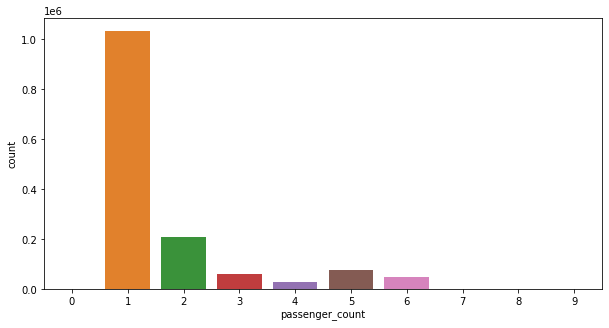

In [77]:
fig = plt.figure(figsize = (10, 5))
sns.countplot(x='passenger_count',data=nyc_df)

In [78]:
nyc_df['passenger_count'].value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [79]:
nyc_df.drop(nyc_df[nyc_df['passenger_count'] >=7].index, inplace = True)
nyc_df.drop(nyc_df[nyc_df['passenger_count'] ==0].index, inplace = True)

In [80]:
nyc_df['passenger_count'].value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

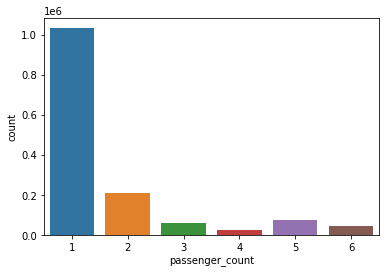

In [81]:
sns.countplot(x='passenger_count', data=nyc_df)

In [82]:
nyc_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [83]:
nyc_df['store_and_fwd_flag'].value_counts()

N    1450533
Y       8042
Name: store_and_fwd_flag, dtype: int64

In [84]:
type(nyc_df.loc[0]['store_and_fwd_flag'])

str

In [85]:
per_N=nyc_df[nyc_df['store_and_fwd_flag']=='N']['store_and_fwd_flag'].count()/nyc_df['store_and_fwd_flag'].count()*100 
print('Percentage of N values:',round(per_N,2),'%')

Percentage of N values: 99.45 %


In [86]:
per_Y=nyc_df[nyc_df['store_and_fwd_flag']=='Y']['store_and_fwd_flag'].count()/nyc_df['store_and_fwd_flag'].count()*100 
print('Percentage of Y values:',round(per_Y,2),'%')

Percentage of Y values: 0.55 %


we will drop store and fwd flag column as they make no sense for considering in this project. This will be done in latter part.

In [87]:
type(nyc_df.iloc[0,2])

str

In [88]:
nyc_df['pickup_datetime']=pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime']=pd.to_datetime(nyc_df['dropoff_datetime'])

In [89]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458575 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458575 non-null  object        
 1   vendor_id           1458575 non-null  int64         
 2   pickup_datetime     1458575 non-null  datetime64[ns]
 3   dropoff_datetime    1458575 non-null  datetime64[ns]
 4   passenger_count     1458575 non-null  int64         
 5   pickup_longitude    1458575 non-null  float64       
 6   pickup_latitude     1458575 non-null  float64       
 7   dropoff_longitude   1458575 non-null  float64       
 8   dropoff_latitude    1458575 non-null  float64       
 9   store_and_fwd_flag  1458575 non-null  object        
 10  trip_duration       1458575 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 133.5+ MB


In [90]:
# Delimit pickup_datetime variable 
nyc_df['pickup_date'] = nyc_df['pickup_datetime'].dt.date # Extract date
nyc_df['pickup_time'] = nyc_df['pickup_datetime'].dt.time # Extract time

# Delimit dropoff_datetime variables
nyc_df['dropoff_date'] = nyc_df['dropoff_datetime'].dt.date # Extract date
nyc_df['dropoff_time'] = nyc_df['dropoff_datetime'].dt.time # Extract time

# Additional pickup features
nyc_df['pickup_month'] = nyc_df['pickup_datetime'].dt.month # Extract month
# train_data['pickup_month'] = train_data.pickup_datetime.dt.to_period('M') # Extract yearmonth
#train_data['pickup_YYYYMM'] = train_data['pickup_datetime'].apply(lambda x: x.strftime('%Y%m')) # Extract yearmonth
nyc_df['pickup_hour'] = nyc_df['pickup_datetime'].dt.hour # Extract hour
nyc_df['pickup_weekday'] = nyc_df['pickup_datetime'].dt.dayofweek # Extract day of week

# Drop concatentated timestamp columns
nyc_df.drop(['pickup_datetime'], axis = 1, inplace = True)
nyc_df.drop(['dropoff_datetime'], axis = 1, inplace = True)

# Confirm changes
nyc_df.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'pickup_date', 'pickup_time',
       'dropoff_date', 'dropoff_time', 'pickup_month', 'pickup_hour',
       'pickup_weekday'],
      dtype='object')